<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

**Задача 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.**

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A + stats.norm.rvs(scale=54,loc=11,size=100)

In [3]:
stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет (не отвергаем H0)')
else:
    print('Различия в эффекте есть (отвергаем H0)')

Statistics=4343.000, p=0.054
Различий в эффекте нет (не отвергаем H0)


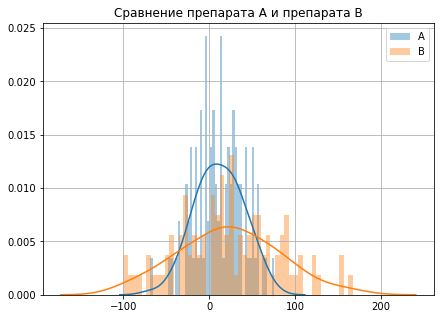

In [4]:
plt.figure(figsize=(7, 5))
sns.distplot(A, 50)
sns.distplot(B, 50)
plt.title('Сравнение препарата A и препарата B')
plt.legend(['A', 'B'])
plt.grid()

**Вывод** Несмотря на полученные результаты теста я бы рекомендавал продолжить проверку двух препаратов, увеличивая размеры выборок. Это обусловленно двумя причинами. Первая, мы получили слишком пограничное p-value 0.054, вторая, визуализировав выборки видно, что данные всеже отличаются друг от друга.

#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A + stats.norm.rvs(scale=54,loc=11,size=100)

In [6]:
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет (не отвергаем H0)')
else:
    print('Различия в эффекте есть (отвергаем H0)')

Statistics=1930.000, p=0.041
Различия в эффекте есть (отвергаем H0)


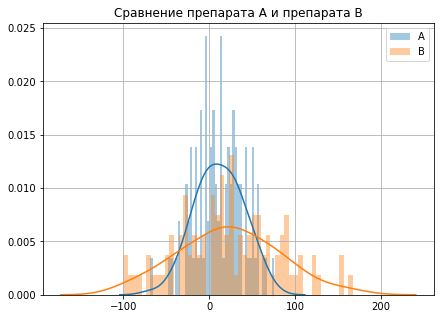

In [7]:
plt.figure(figsize=(7, 5))
sns.distplot(A, 50)
sns.distplot(B, 50)
plt.title('Сравнение препарата A и препарата B')
plt.legend(['A', 'B'])
plt.grid()

**Вывод** В данном тесте нет достаточно оснований чтоб принять Н0. Это подтверждается полученным значением p-value, а также построенной визуализацией.

#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой? 

In [8]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

In [9]:
F, p = f_oneway(nutri, mineral)

alpha = 0.05
print(F, p)

if p > alpha:
    print('Различий в эффекте нет (не отвергаем H0)')
else:
    print('Различия в эффекте есть (отвергаем H0)')

18.128724672228838 0.0001213673340124552
Различия в эффекте есть (отвергаем H0)


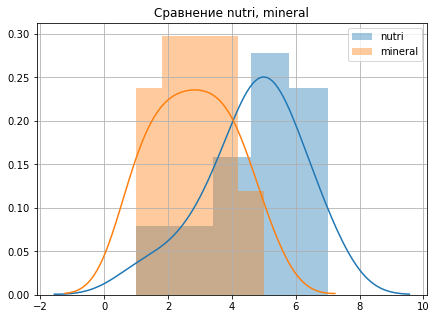

In [10]:
plt.figure(figsize=(7, 5))
sns.distplot(nutri, 5)
sns.distplot(mineral, 5)
plt.title('Сравнение nutri, mineral')
plt.legend(['nutri', 'mineral'])
plt.grid()

**Вывод** В данном тесте нет достаточно оснований чтоб принять Н0. Это подтверждается полученным значением p-value, а также построенной визуализацией.

# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

# Данные A/B тестирования

In [11]:
data = pd.read_csv('cookie_cats.csv') 
data.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [12]:
data.describe()['sum_gamerounds'] # Посмотрим на описательные статистики.

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [13]:
len(data) # Проверим обьем данных.

90189

In [14]:
data.info() # Удостоверимся что нет пропусков.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

# Задание: провести анализ данных и сделать выводы о месте установки ворот. 
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты. 

In [15]:
# Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()['userid']

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

По итогам теста получили почти равное количество пользователей в контрольной и тестовой группах.

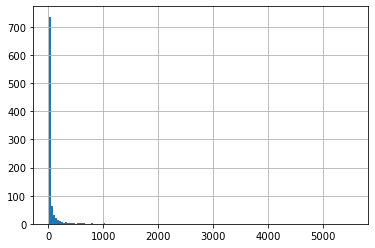

In [16]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=150)

Нибольшее количество игроков вообще не сыграло не одного раунда в течении первой недели после установки либо сыгрло примерно от 1 до 3х раундов.

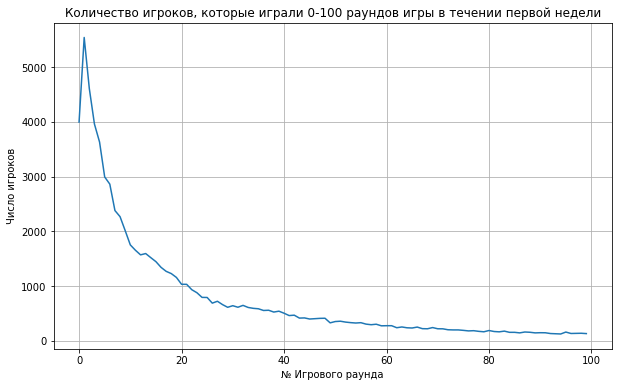

In [17]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("Количество игроков, которые играли 0-100 раундов игры в течении первой недели")
ax.set_ylabel("Число игроков")
ax.set_xlabel('№ Игрового раунда')
ax.grid()

На данном гафике видно, что после проведенных несольких раудов в игре у пользователей пропадает интерес играть дальше.

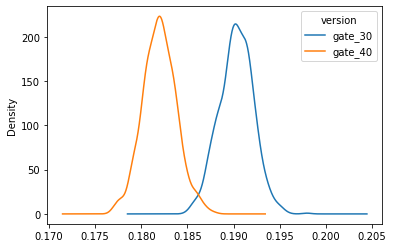

In [18]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

На соновании построенной визаулизации пользователи отдают предпочтение версии **gate_30**.

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

Переведем наше удержание из булевого формата в числовой.

In [19]:
data.loc[data.retention_1 == True, 'retention_one'] = 1
data.loc[data.retention_1 == False, 'retention_one'] = 0
data.loc[data.retention_7 == True, 'retention_seven'] = 1
data.loc[data.retention_7 == False, 'retention_seven'] = 0

In [20]:
data['retention_one'] = data['retention_one'].astype('int')
data['retention_seven'] = data['retention_seven'].astype('int')

In [21]:
data

,userid,version,sum_gamerounds,retention_1,retention_7,retention_one,retention_seven
0,116,gate_30,3,False,False,0,0
1,337,gate_30,38,True,False,1,0
2,377,gate_40,165,True,False,1,0
3,483,gate_40,1,False,False,0,0
4,488,gate_40,179,True,True,1,1
...,...,...,...,...,...,...,...
90184,9999441,gate_40,97,True,False,1,0
90185,9999479,gate_40,30,False,False,0,0
90186,9999710,gate_30,28,True,False,1,0
90187,9999768,gate_40,51,True,False,1,0


Разделим выборки на gate 30 и gate 40

In [22]:
gate_30 = data[data['version'] == 'gate_30']
gate_40 = data[data['version'] == 'gate_40']

Воспользуемся U-критерий Манна — Уитни для проверки эффекта в проводимом тесте.

In [23]:
stat, p = mannwhitneyu(gate_30['retention_one'], gate_40['retention_one'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет (не отвергаем H0)')
else:
    print('Различия в эффекте есть (отвергаем H0)')

Statistics=1010675487.000, p=0.037
Различия в эффекте есть (отвергаем H0)


Эффект проводимого теста есть, посмотрим какая версия ворот лучше.

In [24]:
gate_30['retention_one'].mean(), gate_40['retention_one'].mean()

(0.4481879194630872, 0.44228274967574577)

Всеже первоначальная версия работала лучше. Проделаем аналогичные действия для ретеншен седьмого дня.

In [25]:
stat, p = mannwhitneyu(gate_30['retention_seven'], gate_40['retention_seven'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Различий в эффекте нет (не отвергаем H0)')
else:
    print('Различия в эффекте есть (отвергаем H0)')

Statistics=1008341061.000, p=0.001
Различия в эффекте есть (отвергаем H0)


In [26]:
gate_30['retention_seven'].mean(), gate_40['retention_seven'].mean()

(0.19020134228187918, 0.18200004396667327)

**Вывод** На основании проведенного А/В теста можно утверждать, что c 95 % вероятностью первоначальная версия игры, с воротами на 30м левеле дает лучше удержание пользователя чем версия с 40м левелом.